
# Finding Kelly's Rule
이항(Binary)분포를 따르는 확률게임에서 최적의 베팅규모 찾기

1. Environment setting : A만큼 배팅 시 승리 시 W배, 패배 시 L배로 회수 
2. Generation : 랜덤한 시리즈 생성
3. Kelly's rule : Kelly 방정식을 이용해 최적 베팅규모 계산
4. Calculation : 최적 베팅 규모에 대해 대조군(BM)과 함께 최종수익/표준편차 비교
5. Visualization : 그래프로 시각화


In [24]:
# 1. Environment setting : A만큼 배팅 시 승리 시 W배, 패배 시 L배로 회수 
print("Environment setting")
p = float(input("승리확률:"))
win = float(input("1원 베팅할 때 승리 보수:"))
lose = float(input("1원 베팅할 때 패배 손실(절대값으로):"))
len_series = int(input("시리즈 길이:"))

Environment setting
승리확률:0.6
1원 베팅할 때 승리 보수:1
1원 베팅할 때 패배 손실(절대값으로):0.6
시리즈 길이:300


In [25]:
# 2. Generation : 랜덤한 시리즈 생성
from random import*
series = []
for i in range(len_series) :
    n = uniform(0,1)
    if n < p :      # 0~p가 승리영역, p가 커질수록 승리할 확률이 높아지도록 설계
        a = 1
    else :
        a = 0 
    series.append(a)

print(series[:20])
print("승리 비율:", series.count(1)/len_series)


[0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1]
승리 비율: 0.59


In [26]:
# 3. Kelly's rule : Kelly 방정식을 이용해 최적 베팅규모 계산

# Kelly Equation
bet = p/lose - (1-p)/win

# 계산 후 bet이 0과 1 사이에 들어오도록 조정
if bet > 1 :
    bet = 1
elif bet < 0 :
    bet = 0
print("최적베팅규모:",bet)

최적베팅규모: 0.6


In [27]:

# 4. Calculation : 최적 베팅 규모에 대해 대조군(BM)과 함께 최종수익/표준편차 비교
# 대조군은 총 3가지
import statistics
import math

class game_result :
    def __init__(self, adj_bet) :  # BM별로 bet을 조절하여 사용하므로 bet이 아닌 adj_bet 사용
        self.adj_bet = adj_bet

    def calculation(self) :
        result = []
        money = 1     # 초기자금
        for i in range(len_series) :
            # adj_bet만큼 베팅, 1-adj_bet은 킵
            if series[i] == 1 :     # 승리
                money = money*(1-self.adj_bet) + money*self.adj_bet*(1+win)
            elif series[i] == 0 :   # 패배
                money = money*(1-self.adj_bet) + money*self.adj_bet*(1-lose)
            result.append(money)
        return result
    
    def endpoint(self) :
        end = self.calculation()[-1]
        return end, math.log(end)

kelly = game_result(bet)
result_kelly = kelly.calculation()

# BchM_0는 전부 베팅
BchM_0 = game_result(1)
result_BM_0 = BchM_0.calculation()                

# BM_1은 최적 규모*0.5 (<최적규모)
BchM_1 = game_result(bet*0.5)          
result_BM_1 = BchM_1.calculation()    

# BM_2는 최적규모+(1-최적 규모)*0.5 (>최적규모)
BchM_2 = game_result(bet+(1-bet)*0.5)  
result_BM_2 = BchM_2.calculation()

print("{0:.2f},{1:.2f},{2:.2f},{3:.2f}".format(kelly.endpoint()[0], BchM_0.endpoint()[0], BchM_1.endpoint()[0], BchM_2.endpoint()[0]))
print("{0:.2f},{1:.2f},{2:.2f},{3:.2f}".format(kelly.endpoint()[1], BchM_0.endpoint()[1], BchM_1.endpoint()[1], BchM_2.endpoint()[1]))
# print("std:", statistics.pstdev(result_kelly), statistics.pstdev(result_BM_0), \
#     statistics.pstdev(result_BM_1), statistics.pstdev(result_BM_2))


1947034872797.58,21661.48,3690431949.80,17850265100.95
28.30,9.98,22.03,23.61


<function matplotlib.pyplot.show>

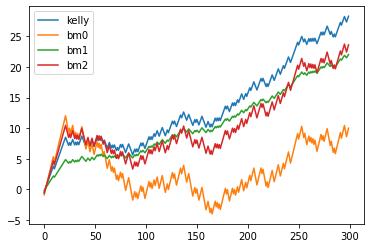

In [28]:
import matplotlib.pyplot as plt
import numpy as np

Ln_kelly = np.log(np.array(result_kelly))
Ln_BM_0 = np.log(np.array(result_BM_0))
Ln_BM_1 = np.log(np.array(result_BM_1))
Ln_BM_2 = np.log(np.array(result_BM_2))

plt.plot(np.arange(len_series), Ln_kelly, label="kelly")
plt.plot(np.arange(len_series), Ln_BM_0, label="bm0")
plt.plot(np.arange(len_series), Ln_BM_1, label="bm1")
plt.plot(np.arange(len_series), Ln_BM_2, label="bm2")
plt.legend()
plt.show